# Fine-tuning (Transfer Learning)

In [1]:
#instantiating the vgg16 convolutional base
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False,
                 input_shape=(150,150,3))

In [2]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

We’ll fine-tune the last three convolutional layers, which means all layers up to block4_pool should be frozen, and the layers block5_conv1, block5_conv2, and
block5_conv3 should be trainable.

In [3]:
#freezing all layers up to a specific one

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [4]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [5]:
#adding a densely connected classifier on top of the convolutional base
from keras import models 
from keras import layers

model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [6]:
import os

base_dir = "cats_and_dogs_small"
train_dir = os.path.join(base_dir,"train")
validation_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

In [7]:
#training the model end-to-end with a frozen convolutional base
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
#calculate steps_per_epoch
batch_size = 20
total_train_samples = 1000
steps_per_epoch = total_train_samples // batch_size
steps_per_epoch

50

In [10]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-5),
             metrics=['acc'])

history=model.fit_generator(train_generator,
                           steps_per_epoch=100,
                           epochs=100,
                           validation_data=validation_generator,
                           validation_steps=50)

C:\Users\oo_wa\AppData\Local\Temp\ipykernel_20268\1821327172.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,


Epoch 1/100
100/100 [==============================] - 256s 3s/step - loss: 0.5452 - acc: 0.7160 - val_loss: 0.3421 - val_acc: 0.8560
Epoch 2/100
100/100 [==============================] - 259s 3s/step - loss: 0.3805 - acc: 0.8285 - val_loss: 0.2675 - val_acc: 0.8830
Epoch 3/100
100/100 [==============================] - 249s 2s/step - loss: 0.3202 - acc: 0.8620 - val_loss: 0.2808 - val_acc: 0.8700
Epoch 4/100
100/100 [==============================] - 249s 2s/step - loss: 0.2947 - acc: 0.8640 - val_loss: 0.2082 - val_acc: 0.9080
Epoch 5/100
100/100 [==============================] - 246s 2s/step - loss: 0.2667 - acc: 0.8860 - val_loss: 0.2214 - val_acc: 0.9050
Epoch 6/100
100/100 [==============================] - 257s 3s/step - loss: 0.2514 - acc: 0.8950 - val_loss: 0.2081 - val_acc: 0.9080
Epoch 7/100
100/100 [==============================] - 251s 3s/step - loss: 0.2392 - acc: 0.8950 - val_loss: 0.2365 - val_acc: 0.8970
Epoch 8/100
100/100 [==============================] - 245s 2s

Epoch 62/100
100/100 [==============================] - 239s 2s/step - loss: 0.0374 - acc: 0.9875 - val_loss: 0.2162 - val_acc: 0.9360
Epoch 63/100
100/100 [==============================] - 268s 3s/step - loss: 0.0559 - acc: 0.9795 - val_loss: 0.2128 - val_acc: 0.9360
Epoch 64/100
100/100 [==============================] - 252s 3s/step - loss: 0.0317 - acc: 0.9890 - val_loss: 0.2509 - val_acc: 0.9330
Epoch 65/100
100/100 [==============================] - 266s 3s/step - loss: 0.0391 - acc: 0.9850 - val_loss: 0.2533 - val_acc: 0.9320
Epoch 66/100
100/100 [==============================] - 275s 3s/step - loss: 0.0347 - acc: 0.9890 - val_loss: 0.2304 - val_acc: 0.9370
Epoch 67/100
100/100 [==============================] - 251s 3s/step - loss: 0.0415 - acc: 0.9860 - val_loss: 0.3542 - val_acc: 0.9170
Epoch 68/100
100/100 [==============================] - 250s 3s/step - loss: 0.0404 - acc: 0.9845 - val_loss: 0.2413 - val_acc: 0.9250
Epoch 69/100
100/100 [==============================] -

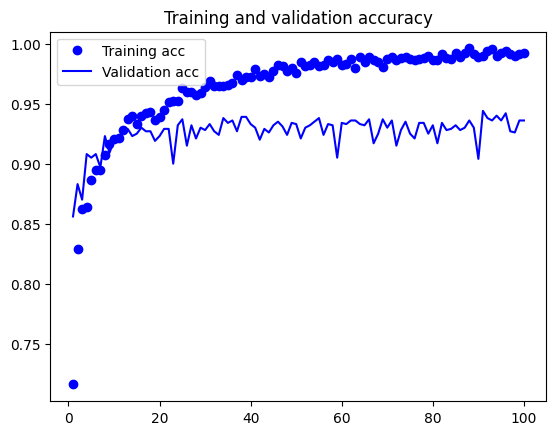

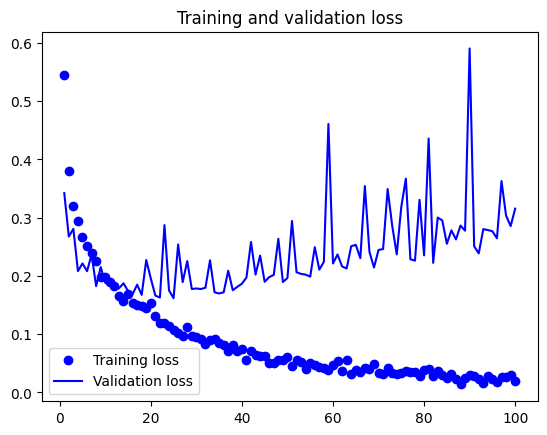

In [11]:
#plotting the results
import matplotlib.pyplot as plt 

acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()
plt.show()

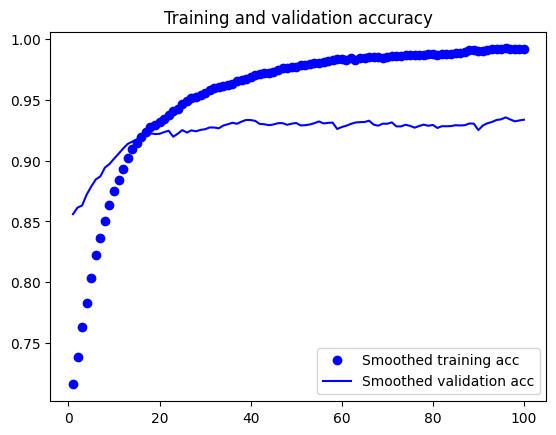

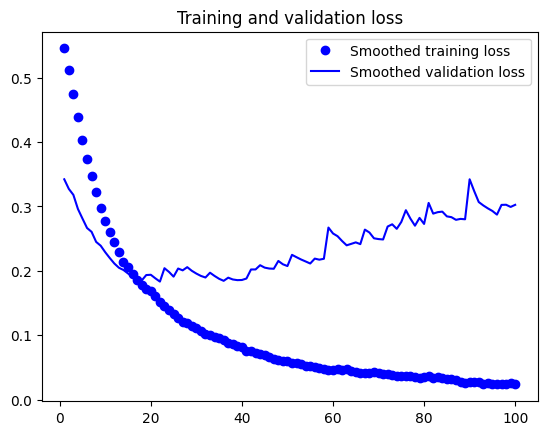

In [12]:
#smoothing the plots
def smooth_curve(points, factor=0.8): 
    smoothed_points = [] 
    for point in points: 
        if smoothed_points: 
            previous = smoothed_points[-1] 
            smoothed_points.append(previous * factor + point * (1 - factor))
        else: 
            smoothed_points.append(point)

    return smoothed_points 
plt.plot(epochs,smooth_curve(acc), 'bo', label='Smoothed training acc') 
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()

plt.plot(epochs,smooth_curve(loss), 'bo', label='Smoothed training loss') 
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [13]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150), 
                                                  batch_size=20,
                                                  class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)

print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


C:\Users\oo_wa\AppData\Local\Temp\ipykernel_20268\3425063779.py:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.9350000023841858


In [14]:
model.save("cats_vs_dogs_finetuned_93.h5")